<a href="https://colab.research.google.com/github/onssaadallah/ImageClef-Lifelog-2020/blob/main/Word_Embedding_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of word Embedding Techniques (GLOVE, Word2Vec,FastText) on textual Queries of the lifelog data (ImageClef competition)



```
#We build the three models from scratch
```



**Import Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Install Packages**

In [ ]:
pip install glove-python

In [ ]:
!pip install  gensim

**Import Packages**

In [ ]:
import numpy as np

import os
import pickle
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer

nltk.download('punkt')
nltk.download('stopwords')
tokenizer = TreebankWordTokenizer()

stoplist = stopwords.words('english')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Load Dataset(Train set)**

The dataset of the lifelog is a multimodal dataset that contains of 50days of data form a lifelogger(1,500-2500 per day from wearable cameras). The dataset also forms of metadata stored in XML file. the XML file presents the dataset of the textual queries that describe the different moments of life logger in the topic .So each topic of the data is divided into three parts which are Title(the title of the topic), Description (describe the specific moment of the topic) and, narrative (give more details about the topic).

In [ ]:
file = open("/content/drive/My Drive/Colab Notebooks/topic2020/topic2 (2).xml")
Data= file.read()
print(Data)

<?xml version="1.0" encoding="UTF-8"?> 
<topics>
<topic>
<topic>
<id>001</id>
<uid>u1</uid>
<title>Having Beers in a Bar</title>
<description>Find the moment in 2015 and 2016 when u1 enjoyed
beers in the bar.</description>
<narrative>To be considered relevant, u1 must be clearly in a
bar. Any moments that u1 drinks beers at home or outside without
the bar view are not considered relevant.</narrative>
</topic>
<topic>
<id>002</id>
<uid>u1</uid>
<title>Building Personal Computer</title>
<description>Find the moment when u1 built my personal
computer from scratch.</description>
<narrative>To be considered relevant, u1 must be clearly at
the office with the PC parts on the table. Any moments that the u1
is not in the office or there are no PC parts/uncompleted PCs on
the table are not considered relevant.</narrative>
</topic>
<topic>
<id>003</id>
<uid>u1</uid>
<title>In A Toy Shop</title>
<description>Find the moment when u1 was looking at items in
a toyshop.</description>
<narrative>To be

**Preprocessing**

the data of queries structured in an XML file. So, I used the BeautifulSoup  Python library to parse the script of the XML to the text file then I clean the text by using an nltk pre-processing techniques(i.e. natural language talking nltk is a python library used for the pre-processing the text ). 
I use the predefined stopwords list of nltk and I add a list of non-useful words. The objective of the preprocessing is to reduce the number of noisy words (noisy words are words that don’t have any relation with the topic )





**Parsing the XML data to text file**

In [ ]:
from bs4 import BeautifulSoup
import lxml

file = open("/content/drive/MyDrive/Colab Notebooks/PFA /Data.xml")
page = file.read()

soup = BeautifulSoup(page, features="lxml")
dataset=soup.get_text()
print(dataset)
h = open("/content/drive/MyDrive/Colab Notebooks/PFA /text.txt", "w")

for line in soup:
    h.write(soup.get_text())
h.close()





001
u1
Having Beers in a Bar
Find the moment in 2015 and 2016 when u1 enjoyed
beers in the bar.
To be considered relevant, u1 must be clearly in a
bar. Any moments that u1 drinks beers at home or outside without
the bar view are not considered relevant.


002
u1
Building Personal Computer
Find the moment when u1 built my personal
computer from scratch.
To be considered relevant, u1 must be clearly at
the office with the PC parts on the table. Any moments that the u1
is not in the office or there are no PC parts/uncompleted PCs on
the table are not considered relevant.


003
u1
In A Toy Shop
Find the moment when u1 was looking at items in
a toyshop.
To be considered relevant, u1 must be clearly in a
toyshop. Various toys are being examined, such as electronic
trains, model kits and board games. Being in an electronics store,
or a supermarket, are not considered to be relevant.


004
u1
Television Recording
Find the moments when u1 was being recorded for
a television show.
To be consi

In [ ]:
#cleaning the text
stoplist = stopwords.words('english')

__query_typical_tokens__ = [
     "considered","relevant","to","also","must","without","it","In","clearly","visible","another","perhaps","long", "might",
      "two","a","outside","view","home","uncompleted","electronics store","supermarket","driving a car","cars","any",
      "all","a","in","show","his/her","her","a","one","from","the","moments","Any","examined","To","various","The","moment",
      "visibly","Find","u1","From","it",
    "001","002","003","004","005","006","007","008","009","010"
    

]
remove_word=["in","a","was","the","and","my","at","for","when","from","which","being","s","or","by","on","On","to","any","considered",
      "relevant,","relevant","relevant.","aforementioned","conditions","parts/uncompleted","various","supermarket"]

additional_stopwords2 = ["relevant"]
additional_stopwords=additional_stopwords2
stoplist =stoplist + __query_typical_tokens__+additional_stopwords2+remove_word
line="  "
file = open('/content/drive/MyDrive/Colab Notebooks/PFA /text.txt')


text = file.read()
for word in text.split():
    if word not in stoplist and remove_word:
      
        line+=word+" "
        
   
        
line = line.lower()    
print(line)


  having beers bar 2015 2016 enjoyed beers bar. bar. drinks beers bar building personal computer built personal computer scratch. office pc parts table. office pc pcs table a toy shop looking items toyshop. toyshop. various toys examined, electronic trains, model kits board games. being electronics store, supermarket, television recording recorded television show. television camera front u1. interviewer/cameramen interviewing/recording this take place location. all recording took place day location. public transport home country 2015 2018 using public transports country (ireland). taking form public transport ireland bus, taxi, train boat. driving car seaside moments moment(s) walking sea taking photos eating ice cream. taking walk sea eating ice cream sea visible. shown taking photo camera phone holding ice cream cone time. beach walking pier taking photo eating ice cream. grocery stores moment(s) 2016 2018 grocery shopping weekends. grocery shop buy something it. saturdays sundays gr

In [ ]:

#build list for each topic 
import re 
# remove parenthesis 
input_text_noparens = re.sub(r'\([^)]*\)', '', line)
# store as list of sentences
sentences_strings_ted = []
for line in input_text_noparens.split('\n'):
    m = re.match(r'^(?:(?P<precolon>[^:]{,20}):)?(?P<postcolon>.*)$', line)
    sentences_strings_ted.extend(sent for sent in m.groupdict()['postcolon'].split('.') if sent)
# store as list of lists of words
sentences_ted = []
for sent_str in sentences_strings_ted:
    tokens = re.sub(r"[^a-z0-9]+", " ", sent_str.lower()).split()
    sentences_ted.append(tokens)


print(sentences_ted)
len(sentences_ted)

[['having', 'beers', 'bar', '2015', '2016', 'enjoyed', 'beers', 'bar'], ['bar'], ['drinks', 'beers', 'bar', 'building', 'personal', 'computer', 'built', 'personal', 'computer', 'scratch'], ['office', 'pc', 'parts', 'table'], ['office', 'pc', 'pcs', 'table', 'a', 'toy', 'shop', 'looking', 'items', 'toyshop'], ['toyshop'], ['various', 'toys', 'examined', 'electronic', 'trains', 'model', 'kits', 'board', 'games'], ['being', 'electronics', 'store', 'supermarket', 'television', 'recording', 'recorded', 'television', 'show'], ['television', 'camera', 'front', 'u1'], ['interviewer', 'cameramen', 'interviewing', 'recording', 'this', 'take', 'place', 'location'], ['all', 'recording', 'took', 'place', 'day', 'location'], ['public', 'transport', 'home', 'country', '2015', '2018', 'using', 'public', 'transports', 'country'], ['taking', 'form', 'public', 'transport', 'ireland', 'bus', 'taxi', 'train', 'boat'], ['driving', 'car', 'seaside', 'moments', 'moment', 'walking', 'sea', 'taking', 'photos', 

49

# Implementation of the Glove Model

In [ ]:
import itertools
import glove
from glove import Corpus
import numpy as np
glove_corpus1= glove.Corpus()
glove_corpus1.fit(sentences_ted,window=10)
mat=glove_corpus1.matrix
dic=glove_corpus1.dictionary
print(len(dic))
print(dic)


125
{'having': 0, 'beers': 1, 'bar': 2, '2015': 3, '2016': 4, 'enjoyed': 5, 'drinks': 6, 'building': 7, 'personal': 8, 'computer': 9, 'built': 10, 'scratch': 11, 'office': 12, 'pc': 13, 'parts': 14, 'table': 15, 'pcs': 16, 'a': 17, 'toy': 18, 'shop': 19, 'looking': 20, 'items': 21, 'toyshop': 22, 'various': 23, 'toys': 24, 'examined': 25, 'electronic': 26, 'trains': 27, 'model': 28, 'kits': 29, 'board': 30, 'games': 31, 'being': 32, 'electronics': 33, 'store': 34, 'supermarket': 35, 'television': 36, 'recording': 37, 'recorded': 38, 'show': 39, 'camera': 40, 'front': 41, 'u1': 42, 'interviewer': 43, 'cameramen': 44, 'interviewing': 45, 'this': 46, 'take': 47, 'place': 48, 'location': 49, 'all': 50, 'took': 51, 'day': 52, 'public': 53, 'transport': 54, 'home': 55, 'country': 56, '2018': 57, 'using': 58, 'transports': 59, 'taking': 60, 'form': 61, 'ireland': 62, 'bus': 63, 'taxi': 64, 'train': 65, 'boat': 66, 'driving': 67, 'car': 68, 'seaside': 69, 'moments': 70, 'moment': 71, 'walking'

**Intialize and fit the model**

In [ ]:
%%time
EMBEDDING_DIM=100
word_embedding = glove.Glove(no_components=100, learning_rate=0.05)
print(word_embedding)
glove_threads =4
word_embedding.fit(mat, epochs=200, no_threads=glove_threads, verbose=0
)
# Add the word -> id dictionary to the model to allow similarity queries.
word_embedding.add_dictionary(dic)


CPU times: user 532 ms, sys: 9.85 ms, total: 542 ms
Wall time: 299 ms


In [ ]:
#saving the model
model_g=word_embedding.save('/content/drive/MyDrive/Colab Notebooks/PFA /glove20.model')

In [ ]:
#load model and return all the words in model dictionary
model=word_embedding.load('/content/drive/MyDrive/Colab Notebooks/PFA /glove20.model')

print(model.dictionary)

{'having': 0, 'beers': 1, 'bar': 2, '2015': 3, '2016': 4, 'enjoyed': 5, 'drinks': 6, 'building': 7, 'personal': 8, 'computer': 9, 'built': 10, 'scratch': 11, 'office': 12, 'pc': 13, 'parts': 14, 'table': 15, 'pcs': 16, 'a': 17, 'toy': 18, 'shop': 19, 'looking': 20, 'items': 21, 'toyshop': 22, 'various': 23, 'toys': 24, 'examined': 25, 'electronic': 26, 'trains': 27, 'model': 28, 'kits': 29, 'board': 30, 'games': 31, 'being': 32, 'electronics': 33, 'store': 34, 'supermarket': 35, 'television': 36, 'recording': 37, 'recorded': 38, 'show': 39, 'camera': 40, 'front': 41, 'u1': 42, 'interviewer': 43, 'cameramen': 44, 'interviewing': 45, 'this': 46, 'take': 47, 'place': 48, 'location': 49, 'all': 50, 'took': 51, 'day': 52, 'public': 53, 'transport': 54, 'home': 55, 'country': 56, '2018': 57, 'using': 58, 'transports': 59, 'taking': 60, 'form': 61, 'ireland': 62, 'bus': 63, 'taxi': 64, 'train': 65, 'boat': 66, 'driving': 67, 'car': 68, 'seaside': 69, 'moments': 70, 'moment': 71, 'walking': 72

**Similarty test**

In [ ]:
model.most_similar('bar')

[('beers', 0.9964726985255468),
 ('enjoyed', 0.8784201243077132),
 ('2015', 0.8268385555814238),
 ('building', 0.8156728662860439)]

In [ ]:
model.most_similar('computer')

[('personal', 0.9905293027051343),
 ('built', 0.9223566709041979),
 ('scratch', 0.9029205203832369),
 ('conditions', 0.6680230045147385)]

In [ ]:
model.most_similar('toyshop')

[('items', 0.6443526826329873),
 ('all', 0.21491534387088593),
 ('built', 0.1867476952387035),
 ('using', 0.1823048664741063)]

In [ ]:
model.most_similar('old')

[('clock', 0.983920577777428),
 ('flowers', 0.9674060087445228),
 ('looking', 0.8737650791677695),
 ('visible', 0.7902951652748454)]

In [ ]:
model.most_similar('interviewing')

[('cameramen', 0.7808152826259098),
 ('recording', 0.4443905170996414),
 ('all', 0.42219185350310245),
 ('took', 0.25430267334811907)]

In [ ]:
model.most_similar('car')

[('repairing', 0.9343687712643992),
 ('garden', 0.903394784754314),
 ('driving', 0.874430250509356),
 ('seaside', 0.8191558815747975)]

**get word vector**

In [ ]:
def get_embedding_vec(word):
    idx = word_embedding.dictionary.get(word.lower(), -1)
    if idx<0:
        #print("Missing word : '%s'" % (word,))
        return np.zeros(  (EMBEDDING_DIM, ), dtype='float32')  # UNK
    return word_embedding.word_vectors[idx]


In [ ]:
get_embedding_vec('beers')

array([-8.10693410e-05, -1.85190868e-02,  6.14944734e-03, -3.66470803e-02,
        1.15959031e-02, -2.27763745e-02,  2.23189388e-02,  1.53528207e-02,
       -1.24553019e-03, -1.90041743e-02,  2.65357927e-02,  5.44011303e-02,
        1.19468663e-02, -1.85166954e-02,  3.42554253e-02, -4.83139437e-02,
       -3.53106713e-02, -1.80923385e-02, -4.06419115e-02, -4.31360703e-02,
        8.59838479e-02,  4.26434632e-02, -2.91137060e-02, -1.45958243e-02,
       -1.40337971e-02, -1.45274598e-02,  6.17821918e-03, -3.72708479e-02,
        5.42664424e-02,  3.14384578e-02, -3.76972558e-02,  6.30979518e-02,
       -3.21069001e-03, -1.12312956e-02,  6.99888086e-02, -3.50529581e-02,
        9.87440455e-03, -2.26443541e-02,  1.90332885e-02, -2.88539252e-02,
        9.11669097e-03, -8.49142066e-03,  3.03168582e-02, -2.05906956e-02,
       -1.03249370e-02,  2.12434861e-02, -2.19591327e-02,  2.81699807e-02,
       -5.11249915e-02, -5.56572006e-03, -2.22745003e-02, -2.97538467e-03,
        6.10798383e-03, -

 **get the closest words and test analogy of the model**

In [ ]:

# word-analogy test
def get_embedding_vec(word):
    idx = model.dictionary.get(word.lower(), -1)
    if idx<0:
        #print("Missing word : '%s'" % (word,))
        return np.zeros(  (EMBEDDING_DIM, ), dtype='float32')  # UNK
    return model.word_vectors[idx]

def get_closest_word(vec, number=5):
    dst = (np.dot(model.word_vectors, vec)
                   / np.linalg.norm(model.word_vectors, axis=1)
                   / np.linalg.norm(vec))
    word_ids = np.argsort(-dst)
    return [(model.inverse_dictionary[x], dst[x]) for x in word_ids[:number]
            if x in model.inverse_dictionary]

In [ ]:
analogy_vec = get_embedding_vec('having') + get_embedding_vec('beers') - get_embedding_vec('bar')
get_closest_word(analogy_vec)

[('having', 0.9690193200786524),
 ('beers', 0.8561825034590829),
 ('bar', 0.8208992584203327),
 ('drinks', 0.7810890780700775),
 ('enjoyed', 0.6751582273672909)]

**get the query vector**

In [ ]:
def get_embedding(Query):
  sentence=[(Query).strip()]
  liste_id=[]
  for word in sentence:
    idx = model.dictionary.get(word) 
    liste_id.append(idx) 
    for idw in liste_id:
        return model.word_vectors[idw]

#exemple query embedding:
np.array(get_embedding('beers in the bar'))   

array([[[-3.53613251e-03, -7.44711414e-03,  1.75408206e-03, ...,
         -5.02383892e-03, -1.76872283e-04, -3.46333566e-03],
        [-8.10693410e-05, -1.85190868e-02,  6.14944734e-03, ...,
         -3.27490928e-03,  3.57807633e-02, -2.04037966e-02],
        [ 6.31492369e-04, -1.43139717e-02,  8.49621820e-03, ...,
          1.09616225e-03,  3.39247352e-02, -2.04464412e-02],
        ...,
        [ 7.19247774e-03,  5.95838077e-03, -2.13573572e-03, ...,
         -9.37847817e-03,  1.71172491e-02, -1.12196462e-03],
        [ 5.06357677e-03,  3.73471917e-03, -5.41372502e-04, ...,
         -7.98237324e-03,  1.34793805e-02,  3.64325568e-03],
        [ 4.14657717e-03, -3.82958484e-03, -2.83858840e-03, ...,
         -6.89148208e-03, -1.86253092e-03,  2.21884490e-03]]])

**Get target words**

In [ ]:
def query_target_words(word1,word2):
  target_list=[]
  vec=get_embedding_vec(word1)+get_embedding_vec(word2)
  res1=get_closest_word(vec)
  target_list=[i  for i,j in res1 if(j>=0.50)]
  print(target_list)


In [ ]:
query_target_words('beers','bar')
query_target_words('built','computer')
query_target_words('items','toyshop')
query_target_words('television','recording')
query_target_words('public','home')
query_target_words('bridge','photo')
query_target_words('public','home')
query_target_words('grocery','shop')
query_target_words('repairing','car')
query_target_words('old','clock')

['beers', 'bar', 'enjoyed', '2015', 'drinks']
['personal', 'computer', 'built', 'scratch', 'conditions']
['items', 'toyshop', 'looking']
['recording', 'television', 'took']
['home', 'transport', 'public', 'moments', 'moment']
['photo', 'bridge', 'taking', 'sea', 'take']
['home', 'transport', 'public', 'moments', 'moment']
['grocery', 'store', 'interacting', 'shop', 'moments']
['car', 'repairing', 'garden', 'driving', 'moments']
['clock', 'old', 'flowers', 'looking', 'visible']


**Model Visualization**

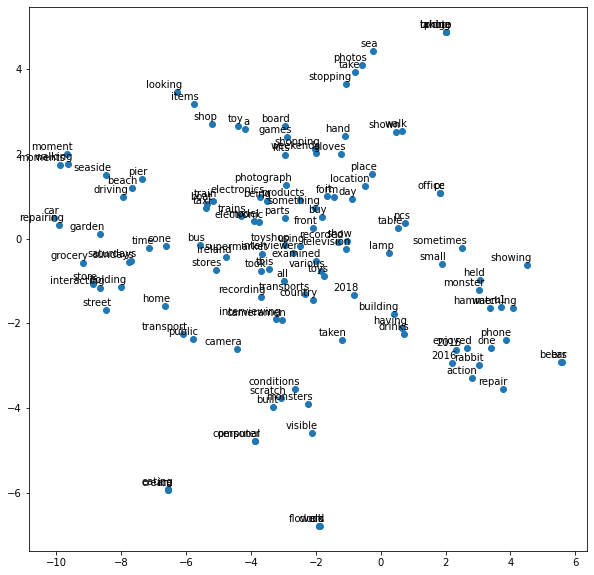

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=40,n_components=2, random_state=23, init='pca',n_iter=2500)
words=model.dictionary.keys()

vectors=[get_embedding_vec(word)for word in words]

Y = tsne.fit_transform(vectors[:1000])
plt.figure(figsize=(10, 10)) 
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y),    xytext=(5, 2), textcoords="offset points",ha='right',
                     va='bottom')


# Implementation of the Word2Vec Model

**Intialize and fit the model**

In [ ]:

from gensim.models import Word2Vec


n=2
modelv = Word2Vec(sentences_ted,min_count=n,size=100,window=5,alpha=0.05,sg=1)
modelv.train(sentences_ted, total_examples=modelv.corpus_count,epochs=30)
print (modelv)

Word2Vec(vocab=125, size=100, alpha=0.05)


In [ ]:
modelv.save('word2vec2_model')
modelv.save('/content/drive/MyDrive/Colab Notebooks/PFA /word2vec2_model')


**Load Model**

In [ ]:
modelv = Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/PFA /word2vec2_model')

**Similarty Test**

In [ ]:
modelv.most_similar("beers")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bar', 0.9993124008178711),
 ('enjoyed', 0.9987481832504272),
 ('built', 0.9987391233444214),
 ('drinks', 0.9984534978866577),
 ('building', 0.9984323978424072),
 ('2016', 0.9984108209609985),
 ('having', 0.9983406662940979),
 ('computer', 0.9981142282485962),
 ('2015', 0.9980274438858032),
 ('scratch', 0.9979254007339478)]

In [ ]:
modelv.most_similar('interviewing')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('this', 0.9993204474449158),
 ('place', 0.99929279088974),
 ('interviewer', 0.9992927312850952),
 ('cameramen', 0.9992337226867676),
 ('location', 0.9991525411605835),
 ('recording', 0.9989435076713562),
 ('took', 0.9988080263137817),
 ('day', 0.9986323714256287),
 ('all', 0.9986211061477661),
 ('take', 0.9984778165817261)]

In [ ]:
modelv.most_similar("car")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('taken', 0.9992990493774414),
 ('stopping', 0.999265193939209),
 ('repairing', 0.9990226030349731),
 ('street', 0.9989744424819946),
 ('garden', 0.9989500045776367),
 ('walking', 0.9987064599990845),
 ('photo', 0.9986486434936523),
 ('bridge', 0.9986342787742615),
 ('moments', 0.9985345005989075),
 ('showing', 0.9983770847320557)]

**get the query vector**

In [ ]:
np.array(modelv.wv['bar'])

array([ 0.07804754,  0.01453433,  0.15159538,  0.14312658, -0.04639286,
       -0.07720876, -0.18387435,  0.05515424,  0.00898441,  0.03507975,
        0.05966068,  0.04513444, -0.15967807,  0.00949835,  0.0192728 ,
       -0.1648095 , -0.15955856,  0.07555592, -0.1476423 ,  0.05490005,
       -0.14285791, -0.02589051,  0.09384964, -0.08902424,  0.02852708,
        0.08043165, -0.03234622, -0.19171815, -0.30966067, -0.11452666,
        0.2767263 ,  0.03722084, -0.18073076,  0.10826663,  0.0498968 ,
       -0.13155478,  0.11789776, -0.08421974,  0.00516014,  0.08778629,
       -0.0797944 ,  0.10929954,  0.09304043, -0.07417326,  0.05983881,
       -0.13667485, -0.16474333,  0.1816387 , -0.08891654, -0.06782553,
       -0.10480425,  0.14270763,  0.03657797,  0.00853089, -0.03484586,
        0.02765275,  0.12840231,  0.10466318, -0.07103992, -0.18194658,
        0.01400151,  0.13253538, -0.07684726, -0.09204175,  0.02338392,
        0.05332693, -0.02735704, -0.10385386, -0.09645043, -0.10

**Get Target Word**

In [ ]:

def tarrget(word):
  target_tokens=[]
  res=modelv.most_similar(word)
  for i,j in res:
    if (j>0.80):
      target_tokens.append(i)
  print(target_tokens)

In [ ]:
vec=['bar','computer','television','toys','sea','car','monsters']
for i in vec:
    tarrget(i)


['beers', 'enjoyed', 'drinks', 'built', 'having', '2016', 'building', 'boat', 'conditions', 'computer']
['scratch', 'building', 'personal', 'built', 'drinks', 'bar', 'beers', 'enjoyed', '2016', 'it']
['recorded', 'supermarket', 'being', 'show', 'electronics', 'store', 'recording', 'camera', 'various', 'sometimes']
['electronic', 'board', 'games', 'examined', 'model', 'kits', 'trains', 'various', 'boat', '2016']
['cream', 'eating', 'taking', 'ice', 'seaside', 'photos', 'walking', 'moments', 'driving', 'pier']
['taken', 'stopping', 'repairing', 'street', 'garden', 'walking', 'photo', 'bridge', 'moments', 'showing']
['small', 'clock', 'one', 'flowers', 'lamp', 'watching', 'old', 'rabbit', 'action', 'visible']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


**Model Visualization**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


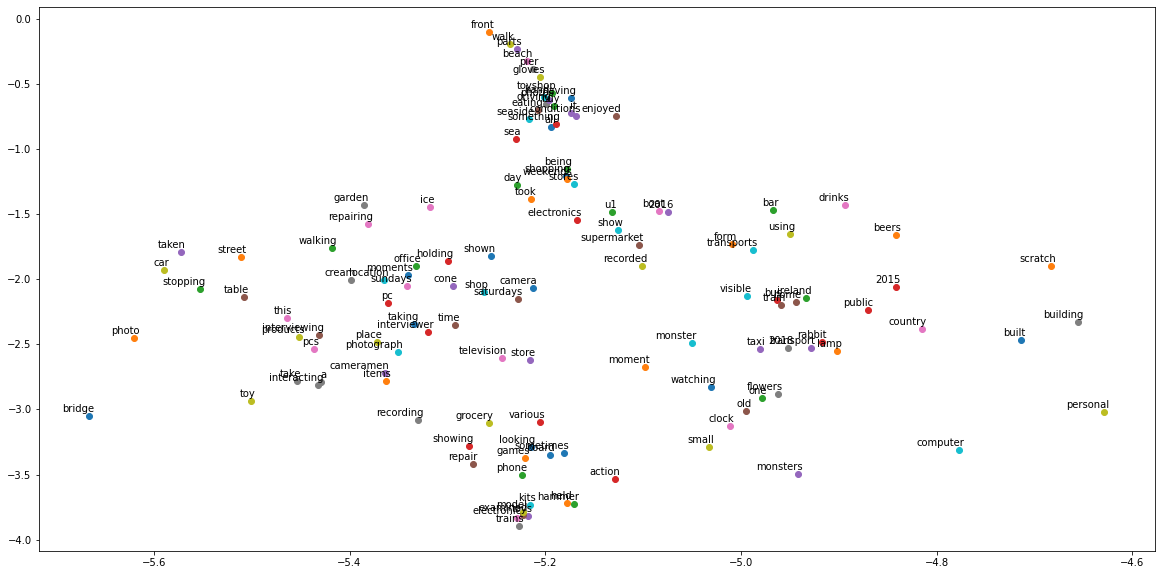

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model_v.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=100, n_components=2, init='pca', n_iter=2500, random_state=23)
    
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(modelv)    

# **Implementation of the model FastText**

**Intialized and traing model**

In [ ]:
%%time
from gensim.models import FastText

n=1
modelf = FastText(min_count =n,size = 100, window=5,sg=1,alpha=0.05)

modelf.build_vocab(sentences_ted,update=0)

modelf.train(sentences_ted, total_examples=modelf.corpus_count, epochs=30)
print(modelf)

FastText(vocab=125, size=100, alpha=0.05)
CPU times: user 618 ms, sys: 9.07 ms, total: 627 ms
Wall time: 636 ms


**Save Model**

In [ ]:
modelf.save('FastText_model')
modelf.save('/content/drive/MyDrive/Colab Notebooks/PFA /FastText_model')

**Load Model**

In [ ]:
modelf=FastText.load('/content/drive/MyDrive/Colab Notebooks/PFA /FastText_model')

**Similarty Test**

In [ ]:
modelf.most_similar("beers")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('flowers', 0.9997888803482056),
 ('enjoyed', 0.9997332692146301),
 ('conditions', 0.9997009038925171),
 ('drinks', 0.9996578693389893),
 ('hammer', 0.9996484518051147),
 ('rabbit', 0.9996395111083984),
 ('clock', 0.9996342658996582),
 ('computer', 0.9996331334114075),
 ('visible', 0.999624490737915),
 ('watching', 0.9996082186698914)]

In [ ]:
modelf.most_similar("interviewing")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('interviewer', 0.9999537467956543),
 ('interacting', 0.9998614192008972),
 ('recording', 0.9998460412025452),
 ('cameramen', 0.9998245239257812),
 ('camera', 0.9997678995132446),
 ('place', 0.999758243560791),
 ('being', 0.9997411966323853),
 ('location', 0.9997329115867615),
 ('saturdays', 0.9997308254241943),
 ('this', 0.9997285008430481)]

In [ ]:
modelf.most_similar("car")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('repairing', 0.9997923970222473),
 ('repair', 0.9997441172599792),
 ('street', 0.9996856451034546),
 ('garden', 0.999651312828064),
 ('stopping', 0.9996305704116821),
 ('bridge', 0.9996218681335449),
 ('taken', 0.9995999336242676),
 ('showing', 0.9995821714401245),
 ('walking', 0.9995402693748474),
 ('photograph', 0.9995217323303223)]

**get the query vector**

In [ ]:
np.array(modelf.wv['bar'])

array([-0.09149504, -0.02526044,  0.11145871,  0.03265468, -0.183314  ,
        0.0310014 , -0.04590725,  0.01078853,  0.0059819 ,  0.07928465,
        0.07794856, -0.05808939, -0.13781503, -0.03237959,  0.14968877,
        0.15344664,  0.02243019, -0.04450122,  0.05897365,  0.05367801,
        0.02507682, -0.04986376, -0.15552163,  0.2638938 , -0.01500718,
        0.0240541 ,  0.00279162, -0.00201211,  0.10222729, -0.0775841 ,
       -0.03299695, -0.05799532,  0.0576384 ,  0.0191436 ,  0.03663424,
        0.0495059 , -0.02194606,  0.03022263, -0.08694933,  0.00520497,
        0.09526165,  0.04818454, -0.0242681 ,  0.29888514, -0.02097346,
        0.13946153,  0.01002174,  0.12867561,  0.009236  , -0.06322905,
       -0.07602624,  0.1208002 , -0.03848835,  0.11691441,  0.08629879,
       -0.08537113, -0.00751025,  0.03350673,  0.0084878 , -0.06922646,
        0.04947817, -0.10565054,  0.04604802, -0.05157241,  0.01415494,
        0.11917397, -0.08700856,  0.13502753, -0.08652627,  0.00

**Get Target Word**

In [ ]:
def tarrget(word):
  target_tokens=[]
  res=modelf.most_similar(word)
  for i,j in res:
    if (j>0.75):
      target_tokens.append(i)
  print(target_tokens)

In [ ]:
vec=['bar','computer','television','toys','sea','car','monsters']
for i in vec:
    tarrget(i)

['having', 'enjoyed', 'grocery', 'something', 'drinks', 'driving', 'weekends', 'beers', 'saturdays', 'sometimes']
['scratch', 'drinks', 'building', 'personal', 'built', 'beers', 'enjoyed', 'holding', 'cone', 'sometimes']
['supermarket', 'recorded', 'recording', 'location', 'saturdays', 'sometimes', 'show', 'cameramen', 'something', 'electronics']
['toyshop', 'office', 'parts', 'items', 'examined', 'electronic', 'shop', 'kits', 'various', 'electronics']
['cream', 'seaside', 'driving', 'eating', 'ice', 'walking', 'having', 'pier', 'photos', 'taking']
['repairing', 'repair', 'street', 'garden', 'stopping', 'bridge', 'taken', 'showing', 'walking', 'photograph']
['monster', 'small', 'flowers', 'old', 'clock', 'one', 'lamp', 'rabbit', 'visible', 'action']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


**Model Visualization**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


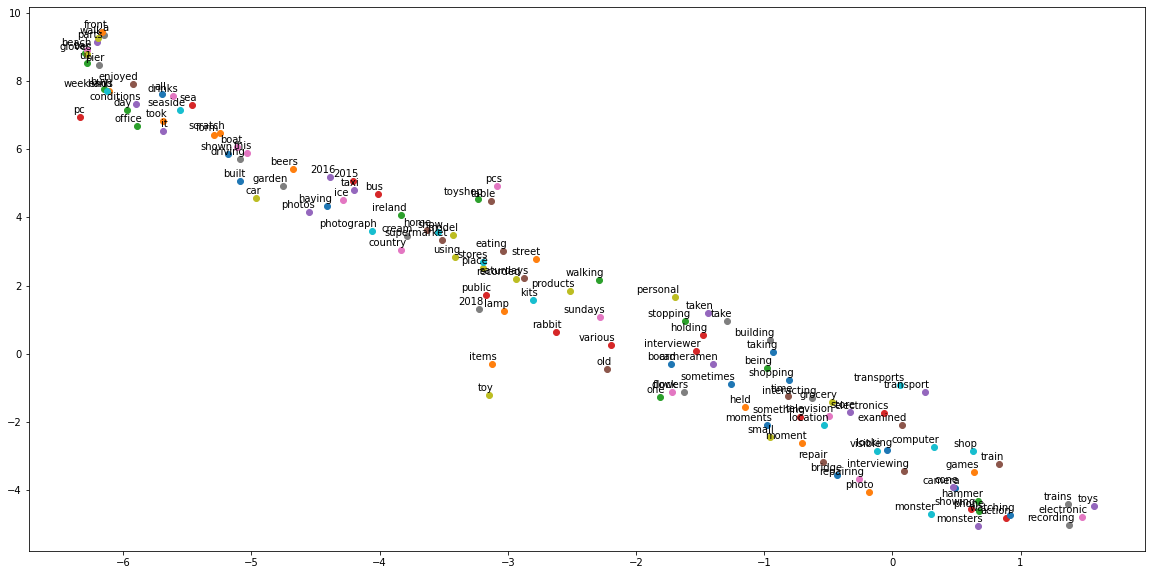

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in modelf.wv.vocab:
        tokens.append(modelf[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)


    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(modelf)    



```
# The Training results (Similarty Test)shows that the Word2Vec  model is  better then FastText and GLOVE
```



# Models Evaluation

**Load Testset**

In [ ]:
file = open("/content/drive/MyDrive/Colab Notebooks/PFA / test.xml")
Test=file.read()
print(Test)

<?xml version="1.0" encoding="UTF-8"?>
<topics>
<topic>
<id>001</id>
<type>precision</type>
<uid>u1</uid>
<title>Praying Rite</title>
<description>Find the moment when u1 was attending a
praying rite with other people in the church.</description>
<narrative>To be relevant, the moment must show u1 is
currently inside the church, attending a praying rite with other
people. The moments that u1 is outside with the church visible or
inside the church but is not attending the praying rite are not
considered relevant.</narrative>
</topic>
<topic>
<id>002</id>
<type>recall</type>
<uid>u1</uid>
<title>Lifelog data on touchscreen on the wall</title>
<description>Find the moment when u1 was looking at
lifelog data on a large touchscreen on the wall.</description>
<narrative>To be relevant, the moment must show u1 is
looking at his lifelog data on the touchscreen wall. The touchscreen
wall showed a range of colorful images at that time. At some moments,
u1 was talking to other people while looking

**Preprocessing**

In [ ]:
from bs4 import BeautifulSoup
import lxml

file = open("/content/drive/MyDrive/Colab Notebooks/PFA / test.xml")
page = file.read()

soup = BeautifulSoup(page, features="lxml")
dataset=soup.get_text()
print(dataset)
h = open("/content/drive/MyDrive/Colab Notebooks/PFA /test.txt", "w")

for line in soup:
    h.write(soup.get_text())
h.close()



001
precision
u1
Praying Rite
Find the moment when u1 was attending a
praying rite with other people in the church.
To be relevant, the moment must show u1 is
currently inside the church, attending a praying rite with other
people. The moments that u1 is outside with the church visible or
inside the church but is not attending the praying rite are not
considered relevant.


002
recall
u1
Lifelog data on touchscreen on the wall
Find the moment when u1 was looking at
lifelog data on a large touchscreen on the wall.
To be relevant, the moment must show u1 is
looking at his lifelog data on the touchscreen wall. The touchscreen
wall showed a range of colorful images at that time. At some moments,
u1 was talking to other people while looking at the lifelog data on
the touchscreen wall. The moments that u1 is looking at the
touchscreen on the wall but it did not show colorful lifelog images
are not considered relevant. The moments that u1 is looking at his
colorful lifelog data on a desktop

In [ ]:
import numpy as np

import os
import pickle

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer

nltk.download('punkt')
nltk.download('stopwords')
tokenizer = TreebankWordTokenizer()

stoplist = stopwords.words('english')
stoplist = stopwords.words('english')

__query_typical_tokens__ = [
     
     "considered","relevant,","precision","u1","To","The","Relevant,","moments","moment","topic","topics","also","must","without","it",
      "in","clearly","visible","another","perhaps","long","might","two","a",
    "001","002", "003","004","005","006","007","008","009","010"]

additional_stopwords2 = ["Relevant"]
additional_stopwords=additional_stopwords2
stoplist =stoplist + __query_typical_tokens__+additional_stopwords2
line="  "
file = open("/content/drive/MyDrive/Colab Notebooks/PFA /test.txt")


text = file.read()
for word in text.split():
    if word not in stoplist:
      
        line+=word+" "
        
print(line)     
        
line = line.lower()       
print(line)
h = open("/content/drive/MyDrive/Colab Notebooks/PFA /data_test.txt", "w")

for l in line:
  if l.split('.'):
    h.write(l)
h.close()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
  Praying Rite Find attending praying rite people church. show currently inside church, attending praying rite people. outside church inside church attending praying rite relevant. recall Lifelog data touchscreen wall Find looking lifelog data large touchscreen wall. show looking lifelog data touchscreen wall. touchscreen wall showed range colorful images time. At moments, talking people looking lifelog data touchscreen wall. looking touchscreen wall show colorful lifelog images relevant. looking colorful lifelog data desktop monitor relevant. Bus work - Bus home Find getting bus office Dublin City University going home bus. bus destination home workplace. waiting bus stop travelling public transportations destination home/workplace relevant. recall Bus airpor

  praying rite find attending praying rite people church. show currently inside church, attending praying rite people. outside church inside church attending praying rite relevant. recall lifelog data touchscreen wall find looking lifelog data large touchscreen wall. show looking lifelog data touchscreen wall. touchscreen wall showed range colorful images time. at moments, talking people looking lifelog data touchscreen wall. looking touchscreen wall show colorful lifelog images relevant. looking colorful lifelog data desktop monitor relevant. bus work - bus home find getting bus office dublin city university going home bus. bus destination home workplace. waiting bus stop travelling public transportations destination home/workplace relevant. recall bus airport find getting bus aircraft landing deck airport. walking bus aircraft landing deck airport after. some possible include walking airplane walking bus parking aircraft landing deck. there would many airplanes visible. other bus air

In [ ]:
import re 
# remove parenthesis 
input_text_noparens = re.sub(r'\([^)]*\)', '', line)
# store as list of sentences
sentences_strings_ted = []
for line in input_text_noparens.split('\n'):
    m = re.match(r'^(?:(?P<precolon>[^:]{,20}):)?(?P<postcolon>.*)$', line)
    sentences_strings_ted.extend(sent for sent in m.groupdict()['postcolon'].split('.') if sent)
# store as list of lists of words
sentences_test = []
for sent_str in sentences_strings_ted:
    tokens = re.sub(r"[^a-z0-9]+", " ", sent_str.lower()).split()
    sentences_test.append(tokens)


print(sentences_test)

[['praying', 'rite', 'find', 'attending', 'praying', 'rite', 'people', 'church'], ['show', 'currently', 'inside', 'church', 'attending', 'praying', 'rite', 'people'], ['outside', 'church', 'inside', 'church', 'attending', 'praying', 'rite', 'relevant'], ['recall', 'lifelog', 'data', 'touchscreen', 'wall', 'find', 'looking', 'lifelog', 'data', 'large', 'touchscreen', 'wall'], ['show', 'looking', 'lifelog', 'data', 'touchscreen', 'wall'], ['touchscreen', 'wall', 'showed', 'range', 'colorful', 'images', 'time'], ['at', 'moments', 'talking', 'people', 'looking', 'lifelog', 'data', 'touchscreen', 'wall'], ['looking', 'touchscreen', 'wall', 'show', 'colorful', 'lifelog', 'images', 'relevant'], ['looking', 'colorful', 'lifelog', 'data', 'desktop', 'monitor', 'relevant'], ['bus', 'work', 'bus', 'home', 'find', 'getting', 'bus', 'office', 'dublin', 'city', 'university', 'going', 'home', 'bus'], ['bus', 'destination', 'home', 'workplace'], ['waiting', 'bus', 'stop', 'travelling', 'public', 'tran

#  GLOVE Model Evaluation

In [ ]:
import itertools
from glove import Glove
import glove
from glove import Corpus
import numpy as np
glove_corpus1= glove.Corpus()
glove_corpus1.fit(sentences_test,window=10)
mat=glove_corpus1.matrix
dic=glove_corpus1.dictionary


In [ ]:
modelG=Glove.load('/content/drive/MyDrive/Colab Notebooks/PFA /glove20.model')

In [ ]:
modelG.add_dictionary(dic)

**Similarty test on the Test set**

In [ ]:
modelG.most_similar("church")

[('find', 0.8784201243077132),
 ('rite', 0.8783179108391803),
 ('attending', 0.8732513788766736),
 ('people', 0.8216232450245964)]

In [ ]:
modelG.most_similar("food")

[('closed', 0.9460542732248661),
 ('order', 0.8788445870069251),
 ('shrimp', 0.8687981635256123),
 ('lobster', 0.8256451348654296)]

In [ ]:
model.most_similar("office")

[('pc', 0.9470012544262006),
 ('pcs', 0.6382280618150644),
 ('table', 0.4607262788243161),
 ('monster', 0.45425778332164934)]

**analogy test**

In [ ]:
def get_embedding_vec(word):
    idx = modelG.dictionary.get(word.lower(), -1)
    if idx<0:
        #print("Missing word : '%s'" % (word,))
        return np.zeros(  (100, ), dtype='float32')  # UNK
    return modelG.word_vectors[idx]


def get_closest_word(vec, number=5):
    dst = (np.dot(modelG.word_vectors, vec)
                   / np.linalg.norm(modelG.word_vectors, axis=1)
                   / np.linalg.norm(vec))
    word_ids = np.argsort(-dst)
    return [(modelG.inverse_dictionary[x], dst[x]) for x in word_ids[:number]
            if x in modelG.inverse_dictionary]


In [ ]:
analogy_vec = get_embedding_vec('praying') + get_embedding_vec('church')
get_closest_word(analogy_vec)

[('church', 0.951421329341558),
 ('rite', 0.9455787989253294),
 ('find', 0.9375557911926237),
 ('attending', 0.8657413688770939),
 ('praying', 0.8353685292164819)]

In [ ]:
def test_analogy(s='one two three '):
    (a,b,c) = s.split(' ')
    analogy_vec = get_embedding_vec(b) +get_embedding_vec(a) 
    words = [ w for (w,p) in get_closest_word(analogy_vec) if w not in (a,b)]
    print("'%s' '%s'  in {%s}" % (a,b,', '.join(words)))
    

In [ ]:
test_analogy('people praying in')

'people' 'praying'  in {church, attending, rite, find}


**Get Target words from test set**

In [ ]:
def query_target_words(word1,word2):
  target_list=[]
  vec=get_embedding_vec(word1)+get_embedding_vec(word2)
  res1=get_closest_word(vec)
  target_list=[i  for i,j in res1 if(j>=0.51)]
  print(target_list)

In [ ]:
print("******Query1******")
Query1=query_target_words('church','praying')
print("******Query2******")
Query2=query_target_words('touchscreen','wall')
print("******Query3******")
Query3=query_target_words('Bus','work')
print("******Query4******")
Query4=query_target_words('Bus','airport')
print("******Query5******")
Query5=query_target_words('medicine','bathroom')
print("******Query6******")
Query6=query_target_words('food','airport')
print("******Query7******")
Query7=query_target_words('Restaurant','seafood')
print("******Query8******")
Query8=query_target_words('eating','pizza')
print("******Query9******")
Query9=query_target_words('socialising','talking')
print("******Query10******")
Query10=query_target_words('meeting','table')





******Query1******
['church', 'rite', 'find', 'attending', 'praying']
******Query2******
['wall', 'touchscreen']
******Query3******
['work', 'bus']
******Query4******
['airport', 'aircraft', 'bus']
******Query5******
['medicine', 'bathroom', 'opening', 'cabinet', 'salmon']
******Query6******
['food', 'closed', 'shrimp', 'order', 'lobster']
******Query7******
['restaurant', 'evening']
******Query8******
['collection', 'eating', 'queuing']
******Query9******
['socialising', 'any', 'other', 'ordering', 'deck']
******Query10******
['meeting', 'order', 'closed', 'places', 'food']


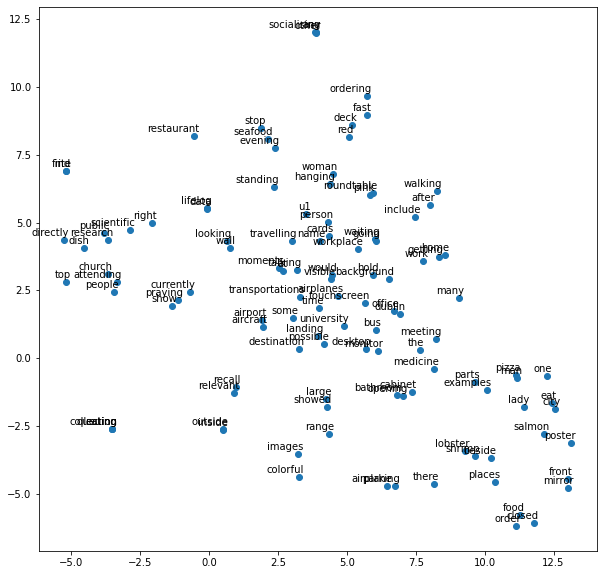

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=30,n_components=2, random_state=23, init='pca',n_iter=2500)
words=modelG.dictionary.keys()

vectors=[get_embedding_vec(word)for word in words]

Y = tsne.fit_transform(vectors[:1000])
plt.figure(figsize=(10, 10)) 
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y),    xytext=(5, 2), textcoords="offset points",ha='right',
                     va='bottom')

plt.show()

# Word2Vec Model Evaluation

In [ ]:
modelV = Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/PFA /word2vec2_model')

In [ ]:
#Update vocab of the Word2Vec Model
modelV.build_vocab(sentences_test,update=1)

**Similarty test on the Test set**

In [ ]:
modelV.most_similar('church')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('food', 0.1847798228263855),
 ('getting', 0.16241644322872162),
 ('lobster', 0.16217221319675446),
 ('include', 0.1618250608444214),
 ('research', 0.14455053210258484),
 ('currently', 0.1376357078552246),
 ('workplace', 0.13233643770217896),
 ('eat', 0.11242072284221649),
 ('going', 0.111134372651577),
 ('collection', 0.11061015725135803)]

In [ ]:
modelV.most_similar('food')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('touchscreen', 0.27329927682876587),
 ('large', 0.26209914684295654),
 ('parking', 0.22534936666488647),
 ('pink', 0.21821384131908417),
 ('church', 0.1847798228263855),
 ('include', 0.16390056908130646),
 ('relevant', 0.1580532342195511),
 ('salmon', 0.1500328630208969),
 ('other', 0.1450793743133545),
 ('images', 0.13942895829677582)]

In [ ]:
modelV.most_similar('office')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('items', 0.9993467330932617),
 ('table', 0.9992483258247375),
 ('shop', 0.9992110729217529),
 ('pc', 0.999177098274231),
 ('toyshop', 0.9991763830184937),
 ('pcs', 0.9991240501403809),
 ('a', 0.9990890026092529),
 ('parts', 0.9988671541213989),
 ('toy', 0.9988664984703064),
 ('looking', 0.9987508654594421)]

# FastText Model Evaluation

In [ ]:
modelF = FastText.load('/content/drive/MyDrive/Colab Notebooks/PFA /word2vec2_model')

In [ ]:
#Update vocab of the Word2Vec Model
modelF.build_vocab(sentences_test,update=1)

**Similarty test on the Test set**

In [ ]:
modelF.most_similar('church')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('food', 0.1847798228263855),
 ('getting', 0.16241644322872162),
 ('lobster', 0.16217221319675446),
 ('include', 0.1618250608444214),
 ('research', 0.14455053210258484),
 ('currently', 0.1376357078552246),
 ('workplace', 0.13233643770217896),
 ('eat', 0.11242072284221649),
 ('going', 0.111134372651577),
 ('collection', 0.11061015725135803)]

In [ ]:
modelF.most_similar('food')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('touchscreen', 0.27329927682876587),
 ('large', 0.26209914684295654),
 ('parking', 0.22534936666488647),
 ('pink', 0.21821384131908417),
 ('church', 0.1847798228263855),
 ('include', 0.16390056908130646),
 ('relevant', 0.1580532342195511),
 ('salmon', 0.1500328630208969),
 ('other', 0.1450793743133545),
 ('images', 0.13942895829677582)]

In [ ]:
modelF.most_similar('office')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('items', 0.9993467330932617),
 ('table', 0.9992483258247375),
 ('shop', 0.9992110729217529),
 ('pc', 0.999177098274231),
 ('toyshop', 0.9991763830184937),
 ('pcs', 0.9991240501403809),
 ('a', 0.9990890026092529),
 ('parts', 0.9988671541213989),
 ('toy', 0.9988664984703064),
 ('looking', 0.9987508654594421)]

According to the similarity test results, we understand that the Word2Vec and FastText models can’t generate new queries of the test set. So this model can't create a semantic relationship not suitable for the main objective. So in the evaluation results, the Glove showed a better performance than Word2Vec and fastText. The Glove model built from scratch gives a weak similarity score.